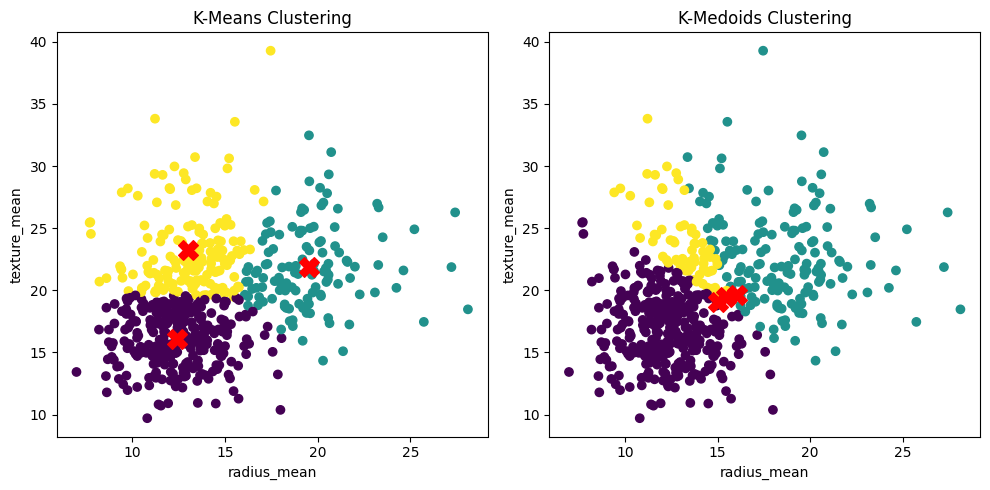

K-Means Cluster Counts: [291 123 155]
K-Medoids Cluster Counts: [340 158  71]


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/cancer.csv')

# Extract the required attributes
data = df[['radius_mean', 'texture_mean']].values

# K-Means clustering
def kmeans_clustering(data, k, max_iterations=100):
    # Initialize centroids randomly
    np.random.seed(42)
    centroids = data[np.random.choice(range(len(data)), size=k, replace=False)]

    for _ in range(max_iterations):
        # Assign points to the nearest centroid
        labels = np.argmin(np.linalg.norm(data[:, np.newaxis] - centroids, axis=-1), axis=-1)

        # Update centroids
        new_centroids = np.array([data[labels == i].mean(axis=0) for i in range(k)])

        # Check convergence
        if np.allclose(centroids, new_centroids):
            break

        centroids = new_centroids

    return labels, centroids

# K-Medoids clustering
def kmedoids_clustering(data, k, max_iterations=100):
    # Initialize medoids randomly
    np.random.seed(42)
    medoids = data[np.random.choice(range(len(data)), size=k, replace=False)]

    for _ in range(max_iterations):
        # Assign points to the nearest medoid
        distances = np.linalg.norm(data[:, np.newaxis] - medoids, axis=-1)
        labels = np.argmin(distances, axis=-1)

        # Update medoids
        new_medoids = np.array([data[labels == i][np.argmin(distances[labels == i].sum(axis=-1))] for i in range(k)])

        # Check convergence
        if np.allclose(medoids, new_medoids):
            break

        medoids = new_medoids

    return labels, medoids

# Perform K-Means clustering
kmeans_labels, kmeans_centroids = kmeans_clustering(data, k=3)

# Perform K-Medoids clustering
kmedoids_labels, kmedoids_medoids = kmedoids_clustering(data, k=3)

# Plotting the clusters
plt.figure(figsize=(10, 5))

# Plot K-Means clusters
plt.subplot(1, 2, 1)
plt.scatter(data[:, 0], data[:, 1], c=kmeans_labels, cmap='viridis')
plt.scatter(kmeans_centroids[:, 0], kmeans_centroids[:, 1], marker='X', color='red', s=200)
plt.xlabel('radius_mean')
plt.ylabel('texture_mean')
plt.title('K-Means Clustering')

# Plot K-Medoids clusters
plt.subplot(1, 2, 2)
plt.scatter(data[:, 0], data[:, 1], c=kmedoids_labels, cmap='viridis')
plt.scatter(kmedoids_medoids[:, 0], kmedoids_medoids[:, 1], marker='X', color='red', s=200)
plt.xlabel('radius_mean')
plt.ylabel('texture_mean')
plt.title('K-Medoids Clustering')

plt.tight_layout()
plt.show()

# Count the number of points belonging to each cluster
kmeans_cluster_counts = np.bincount(kmeans_labels)
kmedoids_cluster_counts = np.bincount(kmedoids_labels)

print(f"K-Means Cluster Counts: {kmeans_cluster_counts}")
print(f"K-Medoids Cluster Counts: {kmedoids_cluster_counts}")